# Centre of Motion | W51d2, W51CA3

## July 10

In [1]:
import pandas as pd
import sys
import numpy as np
sys.path.append('/orange/adamginsburg/ALMA_IMF/reduction/analysis/')
from quicklook_multicolorbar import quicklook
from spectral_cube import SpectralCube
import pylab as pl
import warnings
from astropy.wcs import WCS
from astropy import visualization

In [2]:
fn = '/orange/adamginsburg/w51/2017.1.00293.S/may2021_imaging/w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0'
fh = SpectralCube.read(fn, format='casa_image')

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    ww = WCS(fh[0].header)

In [3]:
def w51north_settings():

    ax.axis([6750,7750,6750,7750])

    radesys = ww.wcs.radesys
    
    _ = ax.set_xlabel(f"Right Ascension {ww.wcs.radesys}")
    _ = ax.set_ylabel(f"Declination {ww.wcs.radesys}")
    
    tick_fontsize = 14
    fontsize = 16
    ra = ax.coords['ra']
    ra.set_major_formatter('hh:mm:ss.s')
    dec = ax.coords['dec']
    ra.set_axislabel(f"RA ({radesys})", fontsize=fontsize)
    dec.set_axislabel(f"Dec ({radesys})", fontsize=fontsize, minpad=0.0)
    ra.ticklabels.set_fontsize(tick_fontsize)
    ra.set_ticklabel(exclude_overlapping=True)
    dec.ticklabels.set_fontsize(tick_fontsize)
    dec.set_ticklabel(exclude_overlapping=True)
    
    return ax

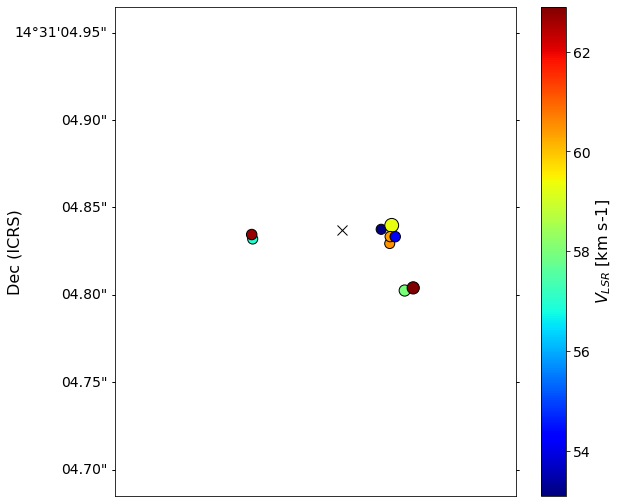

In [30]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(9,9))

ax = pl.subplot(projection=ww)
cen = fh.shape[1]/2, fh.shape[2]/2
df = pd.read_csv('/orange/adamginsburg/w51/vla/19A-254/derod/W51-Masers-and-Starforming-Regions/notebooks/ammonia_radii.csv')

#im = ax.imshow(fh[0].data, cmap='gray', norm=visualization.simple_norm(fh[0].data, stretch='log', max_percent=100.00))
sc = ax.scatter(df.dec, df.ra, c=df.vlsr_kms, s=100*(df.S+1)**(3/4), cmap='jet',facecolors="None", edgecolors='black', transform=ax.get_transform('world'))
ax.scatter(2.909159082e+02, 1.451801029e+01, marker="x", c='black', linewidth=1.0, s=100, transform=ax.get_transform('world'))

w51north_settings()

cb = plt.colorbar(mappable=sc)
cb.set_label("$V_{LSR}$ [km s-1]", fontsize = 16)

ax.axis([cen[0]+355,cen[0]+395,cen[1]-45,cen[1]-5])


cb.ax.tick_params(labelsize=14)
plt.show()

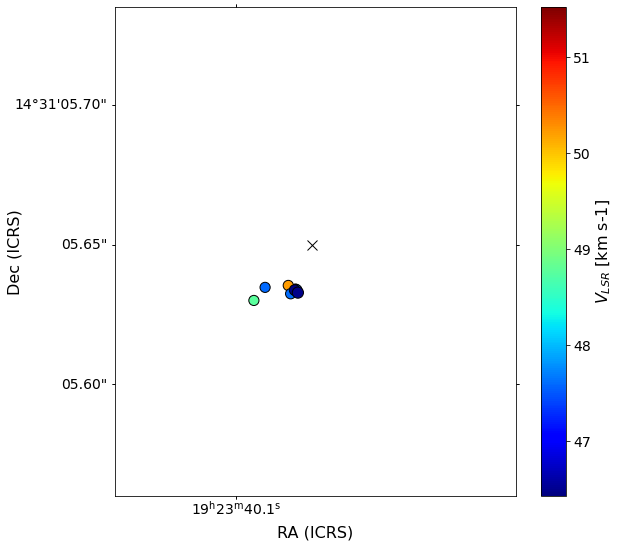

In [5]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(9,9))

ax = pl.subplot(projection=ww)
cen = fh.shape[1]/2, fh.shape[2]/2
df = pd.read_csv('/orange/adamginsburg/w51/vla/19A-254/derod/W51-Masers-and-Starforming-Regions/notebooks/ammonia_ca3.csv')

#im = ax.imshow(fh[0].data, cmap='gray', norm=visualization.simple_norm(fh[0].data, stretch='log', max_percent=100.00))
sc = ax.scatter(df.dec, df.ra, c=df.vlsr_kms, s=100*(df.S+1)**(3/4), cmap='jet',facecolors="None", edgecolors='black', transform=ax.get_transform('world'))
ax.scatter(2.909170738e+02, 1.451823611e+01, marker="x", c='black', linewidth=1.0, s=100, transform=ax.get_transform('world'))

w51north_settings()

cb = plt.colorbar(mappable=sc)
cb.set_label("$V_{LSR}$ [km s-1]", fontsize = 16)

ax.axis([cen[1]-215,cen[1]-190,cen[0]+80,cen[0]+105])


cb.ax.tick_params(labelsize=14)
plt.show()

In [43]:
import numpy as np
X = df.rtc_arcsec
y = df.vlsr_kms

p2 = np.polyfit(X,y,3)
xp = np.linspace(0.02,0.09,100)
yfit = np.polyval(p2,xp)

In [37]:
def keplerian_curve (distance, translate_y): #arcsec
    
    from astropy.constants import G
    
    distance_AU =  (51/0.01)* distance #pixel increment of FITS file in arcesec, convert AU -> arcsec in W51
    distance = (distance_AU * u.AU).to(u.m)
    
    G = G # N*m^2/kg^2
    M = 1.989E30 * u.kg * 10# mass of the sun in kg
    
    translate_y = translate_y * u.m/u.s
    #translate_x = translate_x * u.m
    
    y_top = (-(np.sqrt(G*M/(distance)))/1000) + translate_y
    y_bot = ((np.sqrt(G*M/(np.negative(distance))))/1000) + translate_y
    
    return np.piecewise(distance, [distance > 0, distance < 0],
                    [lambda distance: y_top, lambda distance: y_bot])

In [32]:
def d2_Kelperian_Profile():
    
    fig, ax = plt.subplots(figsize=(9,9))
    sc = ax.scatter(df.rtc_arcsec, df.vlsr_kms,s=20, c='black')
    #sc = ax.errorbar(df.rtc_arcsec, df.vlsr_kms, yerr=df.vlsr_kms_error,fmt="none", c='black', capsize=10)
    _ = ax.set_xlabel(f"Maser distance (\")", fontsize = 16) 
    _ = ax.set_ylabel("$\\nu_{LSR}$ [km s-1]", fontsize = 16)
    #ax.plot(xp,yfit,'m:', label='Rotation curve $1/{\sqrt{r}}$')
    ax.tick_params(labelsize=14)
    ax.legend(fontsize=14)
    plt.title("Keplerian Profile of d2", fontsize=17)

    return ax

In [33]:
def CA3_Kelperian_Profile():
    
    fig, ax = plt.subplots(figsize=(9,9))
    sc = ax.scatter(df.rtc_arcsec, df.vlsr_kms,s=20, c='black')
    sc = ax.errorbar(df.rtc_arcsec, df.vlsr_kms, yerr=df.vlsr_kms_error,fmt="none", c='black', capsize=10)
    _ = ax.set_xlabel(f"Maser distance (\")", fontsize = 16) 
    _ = ax.set_ylabel("$\\nu_{LSR}$ [km s-1]", fontsize = 16)
    ax.plot(xp,yfit,'m:', label='Rotation curve $1/{\sqrt{r}}$')
    ax.tick_params(labelsize=14)
    ax.legend(fontsize=14)
    plt.title("Keplerian Profile of CA3", fontsize=17)
    
    return ax

In [34]:
def 

SyntaxError: invalid syntax (1885169875.py, line 1)

No handles with labels found to put in legend.


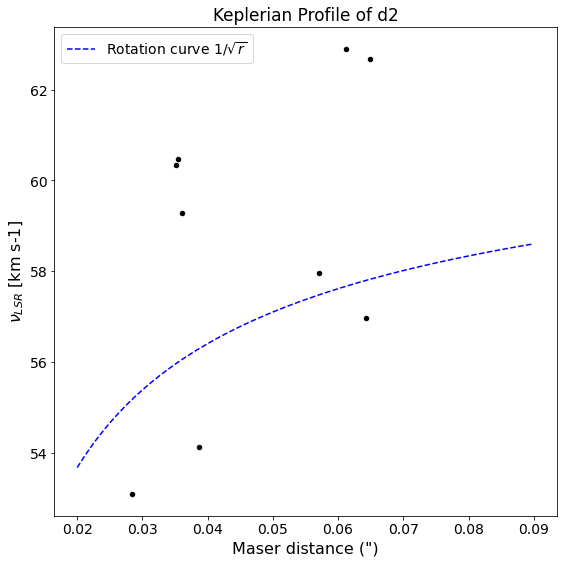

In [44]:
from astropy import units as u

ax = d2_Kelperian_Profile()

ax.plot(xp+0.00, keplerian_curve(xp,63).value,'b--', label='Rotation curve $1/{\sqrt{r}}$')
ax.legend(fontsize=14)

Need to add flux-weighted fit to the maser cloudlets.

In [40]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, y, h, k, c):
    return np.sqrt(((x-h)**2)+((y-k)**2)

xdata = df.rtc_arcsec
ydata = df.vlsr_kms
plt.scatter(xdata, ydata, label='data')

popt, pcov = curve_fit(func, xdata, ydata)
popt

plt.scatter(xdata, func(xdata, *popt), label='fit: a=%10f, b=%6f, c=%0f' % tuple(popt))

x = np.linspace(0.015,.04,100)
y = func(x, -0.299783, 0.881143, 60.318881)

plt.plot(x,y,"m:")

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

SyntaxError: invalid syntax (2257970004.py, line 7)

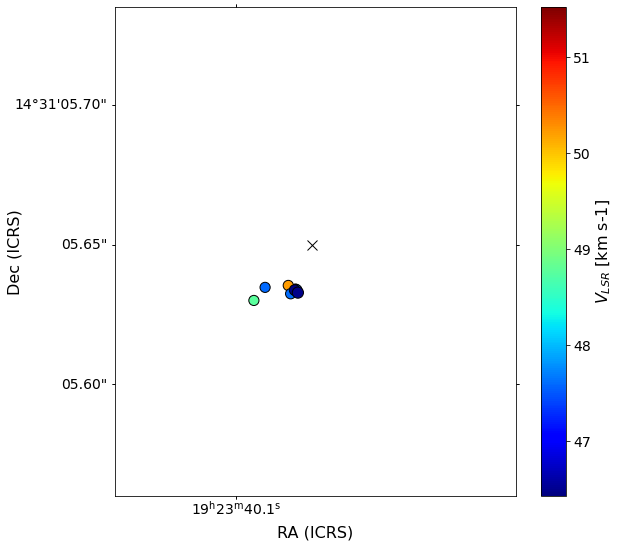

In [10]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(9,9))

ax = pl.subplot(projection=ww)
cen = fh.shape[1]/2, fh.shape[2]/2
df = pd.read_csv('/orange/adamginsburg/w51/vla/19A-254/derod/W51-Masers-and-Starforming-Regions/notebooks/ammonia_ca3.csv')

#im = ax.imshow(fh[0].data, cmap='gray', norm=visualization.simple_norm(fh[0].data, stretch='log', max_percent=100.00))
sc = ax.scatter(df.dec, df.ra, c=df.vlsr_kms, s=100*(df.S+1)**(3/4), cmap='jet',facecolors="None", edgecolors='black', transform=ax.get_transform('world'))
ax.scatter(2.909170738e+02, 1.451823611e+01, marker="x", c='black', linewidth=1.0, s=100, transform=ax.get_transform('world'))

w51north_settings()

cb = plt.colorbar(mappable=sc)
cb.set_label("$V_{LSR}$ [km s-1]", fontsize = 16)

ax.axis([cen[1]-215,cen[1]-190,cen[0]+80,cen[0]+105])


cb.ax.tick_params(labelsize=14)
plt.show()

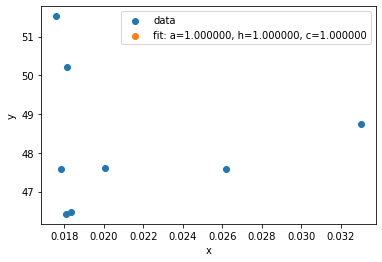

In [89]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * (1/(np.sqrt(x-b))) + c

xdata = df.rtc_arcsec
ydata = df.vlsr_kms

plt.scatter(xdata, ydata, label='data')

popt, pcov = curve_fit(func, xdata, ydata)
popt

plt.scatter(xdata, func(xdata, *popt), label='fit: a=%5f, h=%5f, c=%0f' % tuple(popt))

# x = np.linspace(0.015,.04,100)
# y = func(x, -0.299783, 0.881143, 60.318881)

# plt.plot(x,y,"m:")

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

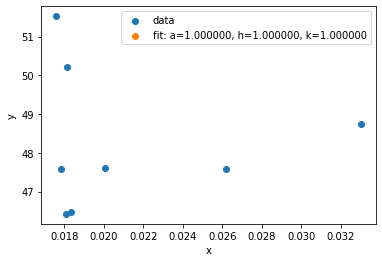

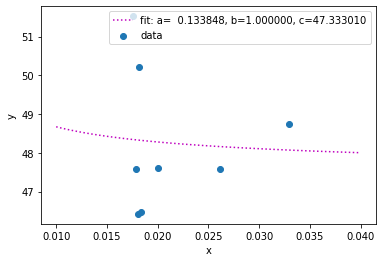

In [26]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * (1/(np.sqrt(x))) + c

xdata = df.rtc_arcsec
ydata = df.vlsr_kms

plt.scatter(xdata, ydata, label='data')

popt, pcov = curve_fit(func, xdata, ydata)
popt

xdata = np.linspace(0.01,.04,50)
plt.plot(xdata, func(xdata, *popt),"m:", label='fit: a=%10f, b=%6f, c=%0f' % tuple(popt))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()